# CAPSTONE PROJECT I 

## Predicting Pain Relievers Based on Age and Satisfaction Level

According to researchers both prescribed and non-prescribed use of pain relievers, as well as rates of opioid-related mortality and admissions to emergency departments, have increased in the last few years. There are many different pain relievers, and each one has advantages and risks. Some types of pain respond better to certain medicines than others. Each person has a different response to a pain reliever for the same type of condition. The dataset used in this project was acquired from kaggle where uploaded on kaggle by scraping the WebMD site (https://www.kaggle.com/rohanharode07/webmd-drugreviews-dataset). The dataset contains 12 variables but in this project we utilize only 7 variables which includes: age, condition, drug, ease of use, effectiveness, satisfaction level of users and the gender of responders. The aim of this project is to identify the users’ response for different pain reliever for the same type of condition and answer the questions below: i. Predict the type of pain relievers for which type of condition based on drug rating (satisfaction), age and sex? ii. Predicting the rating (satisfaction level) based on ease of use and effectiveness The possible stakeholders of this project includes pharmaceutical companies, physicians and clinicians, insurance companies and patients. Knowing the type of pain relievers based on users' response across age distribution and gender helps physicians and clinicians while subscribing to these drugs. Pharmaceutical companies and insurance companies will also identify their focus drugs for their users. Creating a customized logical or scientific communication platform benefits both health and economic success of patients as well

##  1. Importing the relevant libraries and load the data into the data frame

In [1]:
#For this project we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
sns.set
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_svmlight_file
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
df=pd.read_csv('webmd.csv', na_values=' ')

In [3]:
#to display the top 2 rows
df.head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1


In [4]:
#to display the tail 2 rows
df.tail(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [5]:
#total shape of dataset
df.shape

(362806, 12)

## 2. Checking the dataset, cleaning and manupulation

Before diving into data analysis it is important to check whether there are missing values, inconsistent formatting, malformed records or nonsensical outliers. Null values checked in the main dataset and after the selecting pain condition the null values needs to be check. Looking at the dataset under consideration, there is no variables that inconsistent formatting and records or nonsensical outliers.

### 2.1 Checking the dataset

In [6]:
#datatype of each attributes of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
Age              350604 non-null object
Condition        362763 non-null object
Date             362806 non-null object
Drug             362806 non-null object
DrugId           362806 non-null int64
EaseofUse        362806 non-null int64
Effectiveness    362806 non-null int64
Reviews          320945 non-null object
Satisfaction     362806 non-null int64
Sex              336269 non-null object
Sides            345346 non-null object
UsefulCount      362806 non-null int64
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered.
df=df.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [8]:
#Checking the statistical summary of data
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,350604,362763,362806,362806.000000,362806.000000,362806.000000,336269
unique,11,1805,7093,NaN,NaN,NaN,2
top,45-54,Other,cymbalta,NaN,NaN,NaN,Female
freq,80043,49765,4648,NaN,NaN,NaN,238226
mean,NaN,NaN,NaN,4.019829,3.532061,3.135408,NaN
std,NaN,NaN,NaN,1.317711,1.455961,1.611106,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


### 2.2 Data cleaning and manupulation

looking at the count of each attributes there is a difference between each features which indicates that there are null values. Check if null values exist in the dataset.

In [9]:
print('Do null values exist in the dataset? ' + str(df.isnull().values.any()))
#if null values exist calculate the total null vaues in each column:
df.isna().sum()

Do null values exist in the dataset? True


Age              12202
Condition           43
Drug                 0
EaseofUse            0
Effectiveness        0
Satisfaction         0
Sex              26537
dtype: int64

In [10]:
#since Age and Sex are the determining variable through out this project, they cant be null, 
#hence drop the null values from data set.
df.dropna(inplace=True)

In [11]:
#shape the remaining data
df.shape

(331541, 7)

In [12]:
#in the same way, the max value EaseofUse, Effectiveness and Satisfaction 
df.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,331541,331541,331541,331541.000000,331541.000000,331541.000000,331541
unique,11,1742,6793,NaN,NaN,NaN,2
top,45-54,Other,cymbalta,NaN,NaN,NaN,Female
freq,75991,46926,4400,NaN,NaN,NaN,234797
mean,NaN,NaN,NaN,4.047168,3.541333,3.144908,NaN
std,NaN,NaN,NaN,1.299580,1.450075,1.608340,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,3.000000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [13]:
df[df.EaseofUse==6]

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
195073,35-44,Migraine Prevention,"topamax capsule, sprinkle",6,6,6,Female
195282,35-44,Migraine Prevention,topamax,6,6,6,Female


In [14]:
df=df.drop([195073,195282])
df.shape

(331539, 7)

## 3 Data Analysis

The aim of our research is to predict painkiller for different age group considering different condition and other features. Hence we chosed seven very common painkiller hydrocodone-acetaminophen, lyrica,neurontin,cymbalta,gabapentin,tramadol hcl, oxycontin.

In [15]:
df.Drug.value_counts().head(15)

cymbalta                                               4400
lisinopril                                             3972
lisinopril solution                                    3972
lexapro                                                3854
hydrocodone-acetaminophen                              3618
effexor xr                                             3256
lyrica                                                 2881
tramadol hcl                                           2713
tramadol hcl er                                        2713
zoloft                                                 2510
prednisone concentrate                                 2411
prednisone tablet, delayed release (enteric coated)    2411
prednisone                                             2411
seroquel                                               2285
phentermine hcl                                        2229
Name: Drug, dtype: int64

In [16]:
drug=df[df['Drug'].isin(['lyrica','neurontin','cymbalta','gabapentin','tramadol hcl',
                            'hydrocodone-acetaminophen'])] 
print('Total unique conditions for selected drugs is '+ str(drug.Condition.nunique()))
drug.Condition.value_counts().head(10)

Total unique conditions for selected drugs is 24


Pain                                                         5076
Neuropathic Pain                                             3518
Other                                                        2190
Major Depressive Disorder                                    1831
Disorder characterized by Stiff, Tender & Painful Muscles    1415
Pain Originating From a Nerve                                 912
Repeated Episodes of Anxiety                                  553
Chronic Muscle or Bone Pain                                   383
Chronic Pain                                                  297
Acute Pain Following an Operation                             187
Name: Condition, dtype: int64

There are 24 unique condition with different frequency for the selected pain killer. Hence it better to consider top five condition for the selected drugs except the condition 'Other' as it is vague.  

In [17]:
data=drug[drug['Condition'].isin(['Neuropathic Pain', 'Pain', 'Disorder characterized by Stiff, Tender & Painful Muscles','Pain Originating From a Nerve'])]

In [18]:
data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
count,10921,10921,10921,10921.000000,10921.000000,10921.000000,10921
unique,11,4,6,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,2990,5076,3504,NaN,NaN,NaN,7466
mean,NaN,NaN,NaN,4.152642,3.420657,3.208406,NaN
std,NaN,NaN,NaN,1.177729,1.374729,1.528474,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


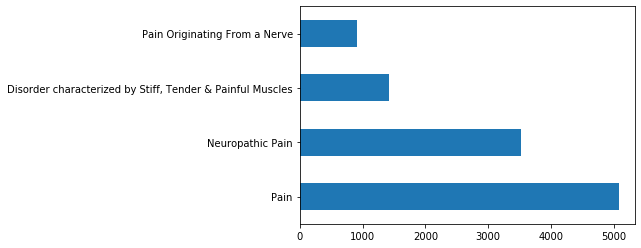

In [19]:
data.Condition.value_counts().plot(kind='barh')

In [20]:
data.Condition.value_counts()

Pain                                                         5076
Neuropathic Pain                                             3518
Disorder characterized by Stiff, Tender & Painful Muscles    1415
Pain Originating From a Nerve                                 912
Name: Condition, dtype: int64

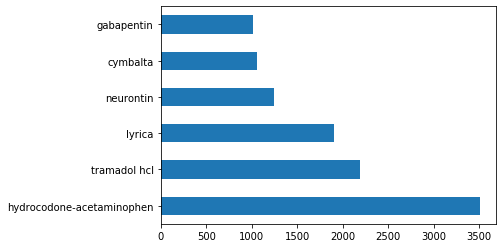

In [21]:
data.Drug.value_counts().plot(kind='barh')

In [22]:
c1=data[data['Condition']=='Pain'].sample(frac=0.591,replace=True)
c2=data[data['Condition']=='Neuropathic Pain'].sample(frac=0.8527,replace=True)
c3=data[data['Condition']=='Disorder characterized by Stiff, Tender & Painful Muscles'].sample(frac=2.12,replace=True)
c4=data[data['Condition']=='Pain Originating From a Nerve'].sample(frac=3.289,replace=True)

In [23]:
drug=pd.concat([c1,c2,c3,c4])

In [24]:
df=drug.reset_index(drop=True)

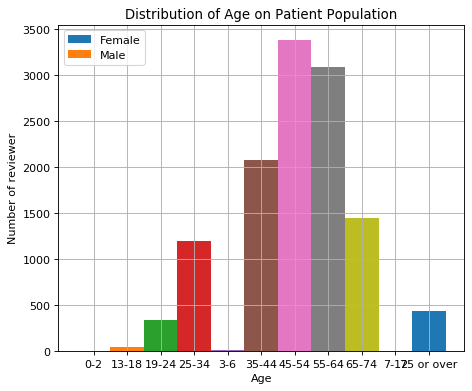

In [25]:
bm=df.groupby('Age')
plt.figure(figsize=(6,5), dpi= 80)
bm['Age'].hist(bins=1,label=bm['Sex'])
plt.title('Distribution of Age on Patient Population')
plt.xlabel('Age')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()

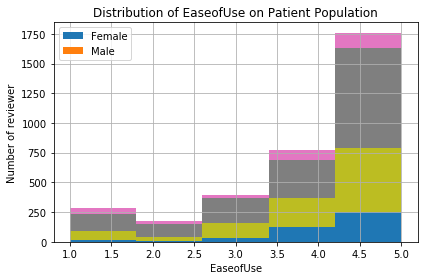

In [26]:
bm['EaseofUse'].hist(bins=5,label=bm['Sex'])
plt.title('Distribution of EaseofUse on Patient Population')
plt.xlabel('EaseofUse')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()

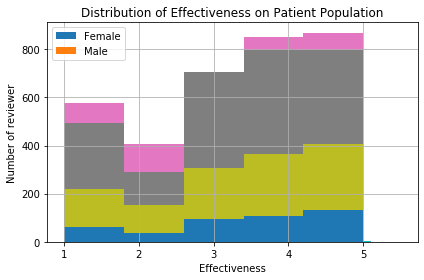

In [27]:
bm['Effectiveness'].hist(bins=5,label=bm['Sex'])
plt.title('Distribution of Effectiveness on Patient Population')
plt.xlabel('Effectiveness')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()


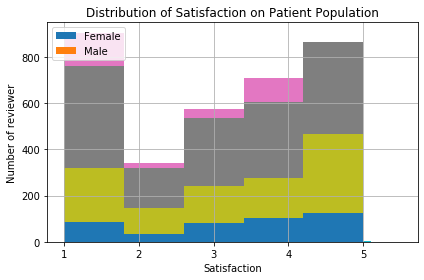

In [28]:
bm['Satisfaction'].hist(bins=5,label=bm['Sex'])
plt.title('Distribution of Satisfaction on Patient Population')
plt.xlabel('Satisfaction')
plt.ylabel('Number of reviewer')
plt.legend(('Female','Male'), loc='upper left')
plt.tight_layout()
plt.show()

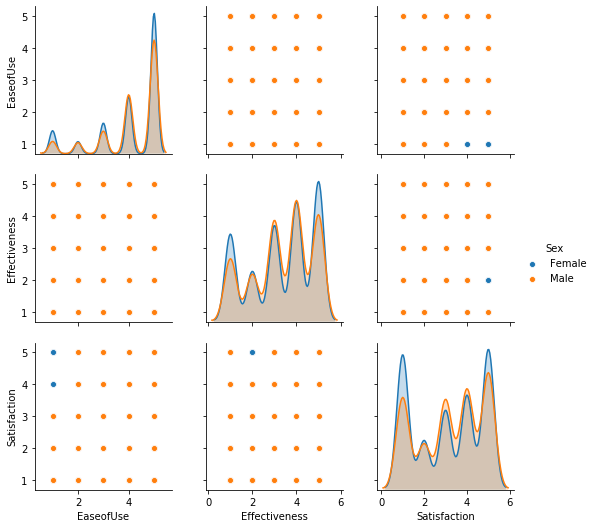

In [29]:
#to see the relaship between features
sns.pairplot(df,hue='Sex')

<Figure size 480x400 with 0 Axes>

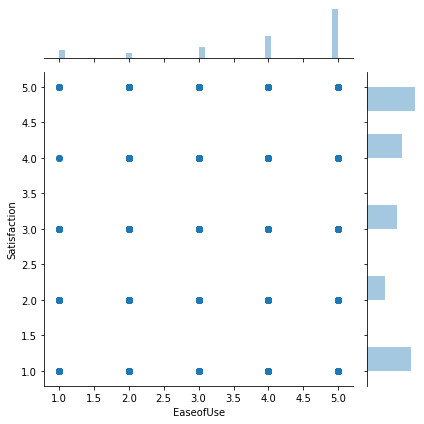

In [30]:
plt.figure(figsize=(6,5), dpi= 80)
sns.jointplot(x=df['EaseofUse'],y=df['Satisfaction'], data=df)
plt.tight_layout()


<Figure size 480x400 with 0 Axes>

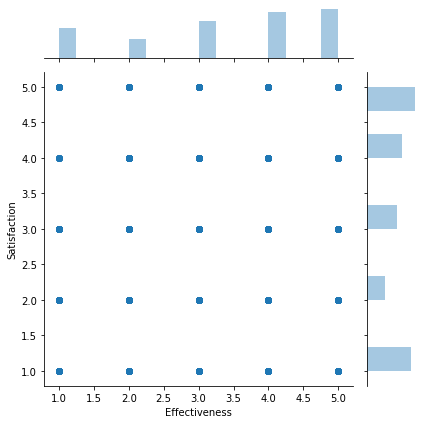

In [31]:
plt.figure(figsize=(6,5), dpi= 80)
sns.jointplot(x=df['Effectiveness'],y=df['Satisfaction'], data=df)
plt.tight_layout()

## 4. Statistical Analysis

### 4.1 Correlation Matrix

A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap using heatmap function of seaborn. In our case we plot the correlation of variables EaseofUse, Effectiveness and Rating. Looking at the plot it the correlation between Effectiveness and Rating is very strong positive correlation than the variables between EaseofUse and Rating. 

In [32]:
df_cor=df.corr()
df_cor

,EaseofUse,Effectiveness,Satisfaction
EaseofUse,1.000000,0.539089,0.561814
Effectiveness,0.539089,1.000000,0.835013
Satisfaction,0.561814,0.835013,1.000000


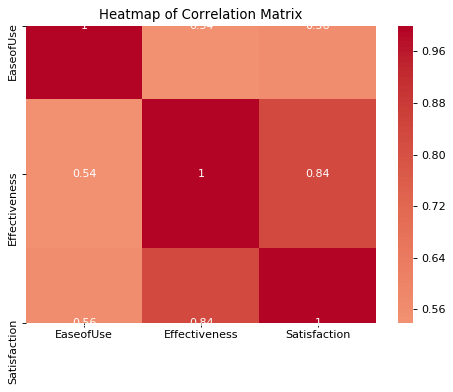

In [33]:
#graphical representation of corellation
plt.figure(figsize=(6,5), dpi= 80)
#corM=np.corrcoef(df.values.T)
hm=sns.heatmap(df_cor, annot=True,center = 0, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()


### 4.2 Hypotheisis formulation

###### Impact of EaseofUse and Satisfaction
Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables.

Hypothesis Testing:  Is there significant difference between the patients response towards EaseofUse and Effectiveness?

Null Hypothesis: (H0: pEU = pEF) The null hypothesis would be that there is no difference in patients response of EaseofUse and Effectiveness.
Alternate Hypothesis: (HA: pEU != pEF) The alternative hypothesis would be that there is a difference in patients response of EaseofUse and Effectiveness.

In oder to test this hypothesis, we conducted t-test using ttest_ind()

#### Effectiveness and Satisfaction

In [34]:
from scipy.stats import ttest_ind
from scipy import stats
ttest,pval = stats.ttest_rel(df['EaseofUse'], df['Satisfaction'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [35]:
ttest,pval = stats.ttest_rel(df['Effectiveness'], df['Satisfaction'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.5736898679047312e-155
reject null hypothesis


#### Correlation of Effectiveness and Satisfaction

In [36]:
from scipy.stats import pearsonr
stat, p = pearsonr(df['Effectiveness'], df['Satisfaction'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Effectiveness and Satisfaction of patient are independent')
else:
    print('Effectiveness and Satisfaction of patient are dependent')

stat=0.835, p=0.000
Effectiveness and Satisfaction of patient are dependent


## 5 Regression Model

### Multicollinearity

Before modeling we sgould check multicollinearity which refers to predictors that are correlated with other predictors. Multicollinearity occurs when model includes multiple factors that are correlated not just to the response variable, but also to each other. In other words, it results when we have factors that are a bit redundant. Sklearn does not have a built-in way to check for multicollinearity

In [37]:
# Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, declare a variable where we put all features where we want to check for 
#multicollinearity since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df[['EaseofUse','Effectiveness','Satisfaction']]

# create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns


In [38]:
# Since Effectiveness has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if Satisfaction seems with a high VIF, too, once 'Effectiveness' is gone that will no longer be the case
vif

,VIF,Features
0,9.387759,EaseofUse
1,21.281474,Effectiveness
2,17.614252,Satisfaction


In [39]:
# Since Year has the highest VIF, I will remove it from the model. # This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_cleaned = df.drop(['Effectiveness'],axis=1)

In [40]:
#rename for simplicity
df=data_cleaned

## 5.2 Machine Learning Modeling

In [41]:
#rearrange columns
cols=['Age', 'Condition', 'EaseofUse', 'Satisfaction', 'Sex','Drug']
df=df[cols]

In [42]:
#preparing input data
#Use built-in stratify mode to ensure equal % label splits
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
X=df.drop('Drug', axis=1)
y=df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123,stratify=y)

In [43]:
def prepare_inpus(X_train,X_test):
    enc=OrdinalEncoder()
    enc.fit(X_train)
    X_train_enc = enc.transform(X_train)
    X_test_enc = enc.transform(X_test)
    return X_train_enc,X_test_enc

In [44]:
def prepare_targets(y_train,y_test):
    enc=OrdinalEncoder()
    enc.fit(y_train)
    y_train_enc = enc.transform(y_train)
    y_test_enc = enc.transform(y_test)
    return y_train_enc,y_test_enc

In [45]:
# prepare input data
X_train_enc, X_test_enc = prepare_inpus(X_train, X_test)
# Feature Scaling: 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train_enc = sc_X.fit_transform(X_train_enc) 
X_test_enc = sc_X.fit_transform(X_test_enc)

In [46]:
# prepare output dat
y_train  = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [47]:
lab_enc = preprocessing.LabelEncoder()
y_test_ency = lab_enc.fit_transform(y_test_enc)

In [48]:
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return roc_auc_score(y_test,y_pred,average=average)

### Logistic Regression

Logistic regression works by using a logit function to transform input value of features and calculate estimated probabilities of a label in range of [0,1]. 

In [49]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train_enc, y_train_enc)
y_log_pred = lr.predict(X_test_enc)
log_pred_y = lab_enc.fit_transform(y_log_pred)
from sklearn.feature_selection import RFE
rfe = RFE(lr, 2) 
rfe.fit(X_train_enc, y_train_enc)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 2
Selected Features: [ True  True False False False]
Feature Ranking: [1 1 4 2 3]


### Decision Tree Model

Decision tree is an algorithm where it predicts the value of a target variable (label) by learning simple decision rules inferred from selected features. Tree is generated and split data on features. It continues to split in repetitive process at each node until leaves reached purity (i.e., remaining samples at each node belongs to same class either non-stroke or stroke cases only).

 1) Condition                      0.675356
 2) Age                            0.111885
 3) Satisfaction                   0.108302
 4) EaseofUse                      0.085074
 5) Sex                            0.019383


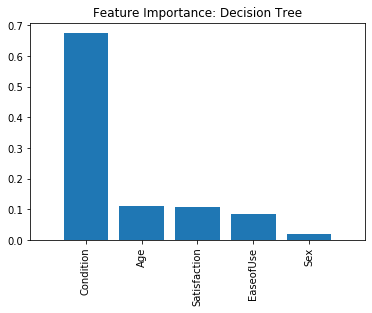

In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_enc, y_train_enc)
y_dtree_pred = dtree.predict(X_test_enc)
dtree_pred_y = lab_enc.fit_transform(y_dtree_pred)
feat_labels = df.columns[:-1]
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_enc.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance: Decision Tree')
plt.bar(range(X_train_enc.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_enc.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_enc.shape[1])
plt.show()

### Random forest

Random forest is a typical ensemble learning model. It takes random subsample of data from each tree, so all constructed trees are different from each other. Thus, model makes classification based on predictions made from each tree with averaging (i.e., like picking a vote from majority).

 1) Condition                      0.649450
 2) Age                            0.137584
 3) Satisfaction                   0.095974
 4) EaseofUse                      0.093846
 5) Sex                            0.023146


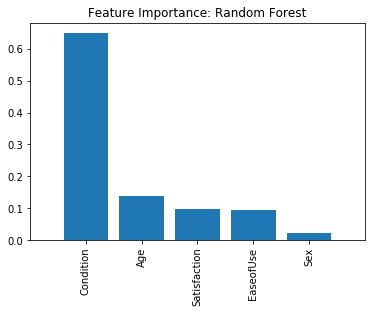

In [51]:
# Feature Selection: 
# Using a Random Forest:
rf = RandomForestClassifier()
rf.fit(X_train_enc, y_train_enc)
y_rf_pred = rf.predict(X_test_enc);
rf_pred_y = lab_enc.fit_transform(y_rf_pred)
feat_labels = df.columns[:-1]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_enc.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Random Forest')
plt.bar(range(X_train_enc.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_enc.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_enc.shape[1])
plt.show()

 1) Condition                      0.907655
 2) Satisfaction                   0.033925
 3) Age                            0.030927
 4) EaseofUse                      0.014226
 5) Sex                            0.013266


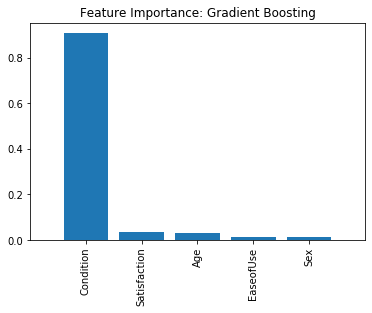

In [52]:
# Feature Selection: 
# Using a Gradient Boosting Classifier:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_enc, y_train_enc)
y_gbc_pred = gbc.predict(X_test_enc)
gb_pred_y = lab_enc.fit_transform(y_gbc_pred)
feat_labels = df.columns[:-1]
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_enc.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Gradient Boosting')
plt.bar(range(X_train_enc.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_enc.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_enc.shape[1])
plt.show()


 1) Condition                      0.905527
 2) Satisfaction                   0.026832
 3) Sex                            0.024286
 4) Age                            0.022303
 5) EaseofUse                      0.021052


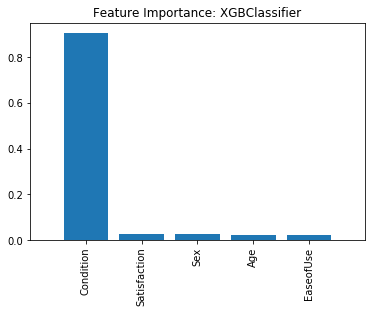

In [53]:
# Feature Selection:  Using a XGBClassifier:
xgbc = XGBClassifier()
xgbc.fit(X_train_enc, y_train_enc)
y_xgbc_pred = xgbc.predict(X_test_enc)
xgb_pred_y = lab_enc.fit_transform(y_xgbc_pred)
feat_labels = df.columns[:-1]
importances = xgbc.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_enc.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: XGBClassifier')
plt.bar(range(X_train_enc.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_enc.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_enc.shape[1])
plt.show()


 1) Condition                      0.685807
 2) Age                            0.133470
 3) Satisfaction                   0.080108
 4) EaseofUse                      0.079017
 5) Sex                            0.021598


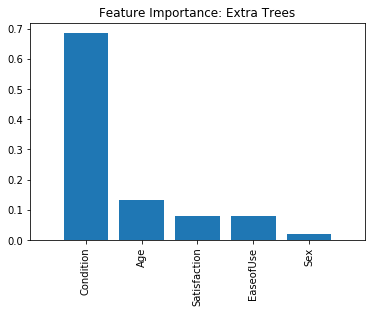

In [54]:
# Feature Selection: Using a Extra Trees Classifier:
ext = ExtraTreesClassifier()
ext.fit(X_train_enc, y_train_enc)
y_ext_pred = ext.predict(X_test_enc)
ex_pred_y = lab_enc.fit_transform(y_ext_pred)
feat_labels = df.columns[:-1]
importances = ext.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_enc.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Extra Trees')
plt.bar(range(X_train_enc.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_enc.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_enc.shape[1])
plt.show()


In [55]:
gas = GaussianNB()
gas.fit(X_train_enc, y_train_enc)
y_gas_pred = gas.predict(X_test_enc)
ga_pred_y = lab_enc.fit_transform(y_gas_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ga_pred_y)
print('GuasianNB Result')
print(sk_report)
print('roc_auc_score of GuasianNB is: '+str(multiclass_roc_auc_score(y_test_ency, ga_pred_y)))

GuasianNB Result
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       352
           1      0.069     0.177     0.099       469
           2      0.285     0.488     0.360       506
           3      0.213     0.157     0.181       619
           4      0.000     0.000     0.000       573
           5      0.000     0.000     0.000       481

    accuracy                          0.142      3000
   macro avg      0.095     0.137     0.107      3000
weighted avg      0.103     0.142     0.113      3000

roc_auc_score of GuasianNB is: 0.48341044128588884


In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train_enc, y_train_enc)
y_knn_pred = knn.predict(X_test_enc)
kn_pred_y = lab_enc.fit_transform(y_knn_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=kn_pred_y)
print('KNeighborsClassifier Result')
print(sk_report)
print('roc_auc_score of KNeighborsClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, kn_pred_y)))

KNeighborsClassifier Result
              precision    recall  f1-score   support

           0      0.352     0.392     0.371       352
           1      0.481     0.386     0.428       469
           2      0.689     0.832     0.754       506
           3      0.497     0.598     0.543       619
           4      0.589     0.592     0.590       573
           5      0.405     0.254     0.312       481

    accuracy                          0.524      3000
   macro avg      0.502     0.509     0.500      3000
weighted avg      0.513     0.524     0.512      3000

roc_auc_score of KNeighborsClassifier is: 0.7065042656881985


In [57]:
kms = KMeans()
kms.fit(X_train_enc, y_train_enc)
y_kms_pred = kms.predict(X_test_enc)
km_pred_y = lab_enc.fit_transform(y_kms_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=km_pred_y)
print('KMeans Result')
print(sk_report)
print('roc_auc_score of KMeans is: '+str(multiclass_roc_auc_score(y_test_ency, km_pred_y)))

KMeans Result
              precision    recall  f1-score   support

           0      0.228     0.347     0.275       352
           1      0.174     0.154     0.163       469
           2      0.228     0.140     0.174       506
           3      0.263     0.132     0.176       619
           4      0.100     0.065     0.079       573
           5      0.147     0.091     0.113       481
           6      0.000     0.000     0.000         0
           7      0.000     0.000     0.000         0

    accuracy                          0.143      3000
   macro avg      0.143     0.116     0.122      3000
weighted avg      0.189     0.143     0.157      3000

roc_auc_score of KMeans is: 0.5172480729577613


### XGBoost model

XGBoost is a type of gradient boosting model in which subsequent model learns from the mistakes (i.e., residual errors) of previous model in a step-wise forward manner. In Gradient Boosting, residual errors are identified gradients. These gradients help how XGBoost to improve model performances.

In [58]:
bag =  BaggingClassifier()
bag.fit(X_train_enc, y_train_enc)
y_bag_pred = bag.predict(X_test_enc)
ba_pred_y = lab_enc.fit_transform(y_bag_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ba_pred_y)
print('BaggingClassifier Result')
print(sk_report)
print('roc_auc_score of BaggingClassifier is: '+str(multiclass_roc_auc_score(y_test_ency, ba_pred_y)))

BaggingClassifier Result
              precision    recall  f1-score   support

           0      0.396     0.276     0.325       352
           1      0.544     0.399     0.460       469
           2      0.692     0.862     0.768       506
           3      0.476     0.711     0.570       619
           4      0.559     0.621     0.588       573
           5      0.436     0.200     0.274       481

    accuracy                          0.537      3000
   macro avg      0.517     0.511     0.498      3000
weighted avg      0.523     0.537     0.513      3000

roc_auc_score of BaggingClassifier is: 0.7086380949262473


In [59]:
linSVC=LinearSVC()
linSVC.fit(X_train_enc, y_train_enc)
y_linSVC_pred=linSVC.predict(X_test_enc);
linSVC_pred_y = lab_enc.fit_transform(y_linSVC_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=linSVC_pred_y)
print('LinearSVC Result')
print(sk_report)
print('roc_auc_score of LinearSVC is: '+str(multiclass_roc_auc_score(y_test_ency, linSVC_pred_y)))

LinearSVC Result
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       352
           1      0.052     0.038     0.044       469
           2      0.000     0.000     0.000       506
           3      0.000     0.000     0.000       619
           4      0.500     0.002     0.003       573
           5      0.000     0.000     0.000       481

    accuracy                          0.006      3000
   macro avg      0.092     0.007     0.008      3000
weighted avg      0.104     0.006     0.008      3000

roc_auc_score of LinearSVC is: 0.40280341031392003


## Model Evaluation

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.


1. True Positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
2. True Negatives (TN): We predicted no, and they don't have the disease.
3. False Positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
4. False Negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

#### Logistic Regression

In [60]:
#Confussion matrix plotting function
def plot_cm (cm, classes):
    fig, ax = plt.subplots(figsize=(10,10))
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')   
    
class_labels=np.array(['lyrica','neurontin','cymbalta','gabapentin','tramadol hcl',
                            'hydrocodone-acetaminophen'],dtype=str)

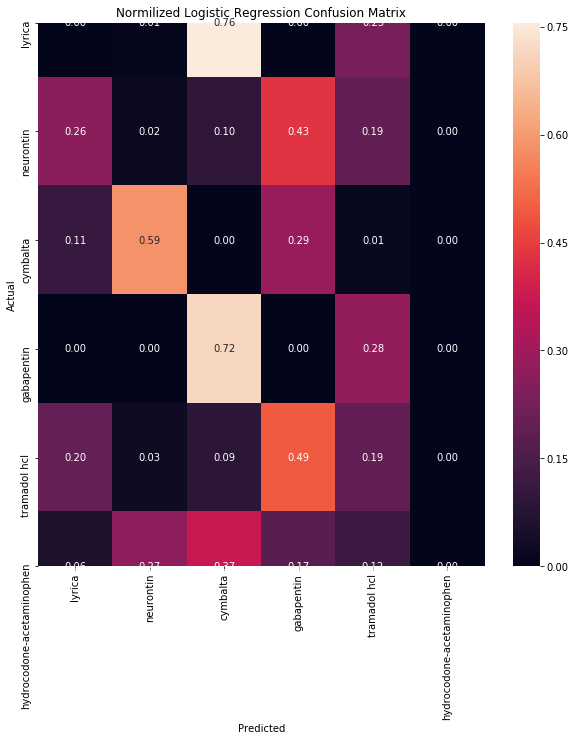

Logistic Regression Result
                           precision    recall  f1-score   support

                   lyrica      0.000     0.000     0.000       352
                neurontin      0.020     0.019     0.019       469
                 cymbalta      0.000     0.000     0.000       506
               gabapentin      0.000     0.000     0.000       619
             tramadol hcl      0.213     0.194     0.203       573
hydrocodone-acetaminophen      0.000     0.000     0.000       481

                 accuracy                          0.040      3000
                macro avg      0.039     0.035     0.037      3000
             weighted avg      0.044     0.040     0.042      3000

ROC score of Logistic Regression is 0.42


In [61]:
# Confusion matrix of Logistic Regression
cm=confusion_matrix(y_test_enc, log_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Logistic Regression Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=log_pred_y,target_names=class_labels)
print('Logistic Regression Result')
print(sk_report)
print('ROC score of Logistic Regression is %0.2f'% (multiclass_roc_auc_score(y_test_ency, log_pred_y)))

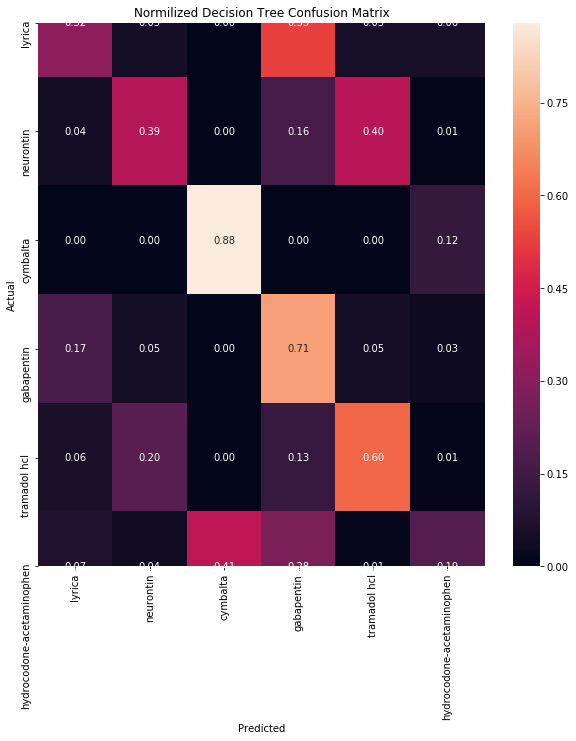

Decision Tree Result
                           precision    recall  f1-score   support

                   lyrica      0.363     0.315     0.337       352
                neurontin      0.508     0.392     0.443       469
                 cymbalta      0.691     0.879     0.774       506
               gabapentin      0.483     0.706     0.573       619
             tramadol hcl      0.586     0.599     0.592       573
hydrocodone-acetaminophen      0.460     0.189     0.268       481

                 accuracy                          0.537      3000
                macro avg      0.515     0.513     0.498      3000
             weighted avg      0.524     0.537     0.514      3000

ROC score of Decision Tree is 0.71


In [62]:
# Confusion matrix of Decision Tree
cm=confusion_matrix(y_test_enc, dtree_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Decision Tree Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=dtree_pred_y,target_names=class_labels)
print('Decision Tree Result')
print(sk_report)
print('ROC score of Decision Tree is %0.2f'% (multiclass_roc_auc_score(y_test_ency, dtree_pred_y)))


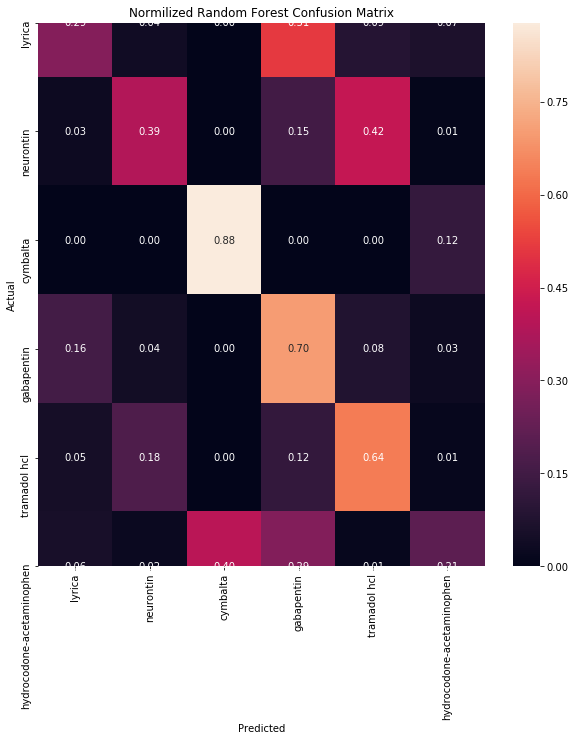

Random Forest Result
                           precision    recall  f1-score   support

                   lyrica      0.383     0.293     0.332       352
                neurontin      0.537     0.386     0.449       469
                 cymbalta      0.696     0.877     0.776       506
               gabapentin      0.485     0.700     0.573       619
             tramadol hcl      0.562     0.635     0.596       573
hydrocodone-acetaminophen      0.472     0.212     0.293       481

                 accuracy                          0.542      3000
                macro avg      0.523     0.517     0.503      3000
             weighted avg      0.529     0.542     0.519      3000

ROC score of Random Forest is 0.71


In [63]:
# Confusion matrix of Random Forest
cm=confusion_matrix(y_test_enc, rf_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Random Forest Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=rf_pred_y,target_names=class_labels)
print('Random Forest Result')
print(sk_report)
print('ROC score of Random Forest is %0.2f'% (multiclass_roc_auc_score(y_test_ency, rf_pred_y)))


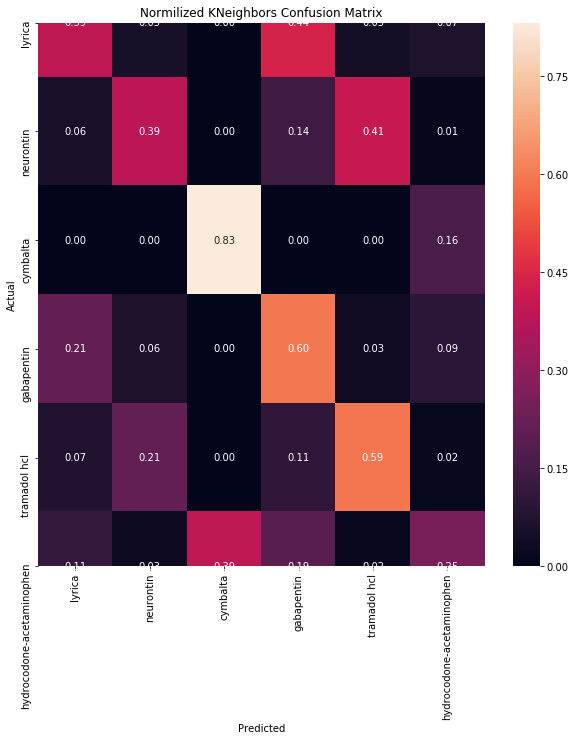

KNeighbors Result
                           precision    recall  f1-score   support

                   lyrica      0.352     0.392     0.371       352
                neurontin      0.481     0.386     0.428       469
                 cymbalta      0.689     0.832     0.754       506
               gabapentin      0.497     0.598     0.543       619
             tramadol hcl      0.589     0.592     0.590       573
hydrocodone-acetaminophen      0.405     0.254     0.312       481

                 accuracy                          0.524      3000
                macro avg      0.502     0.509     0.500      3000
             weighted avg      0.513     0.524     0.512      3000

ROC score of KNeighbors is 0.71


In [64]:
# Confusion matrix of KNeighbors
cm=confusion_matrix(y_test_enc, kn_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized KNeighbors Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=kn_pred_y,target_names=class_labels)
print('KNeighbors Result')
print(sk_report)
print('ROC score of KNeighbors is %0.2f'% (multiclass_roc_auc_score(y_test_ency, kn_pred_y)))


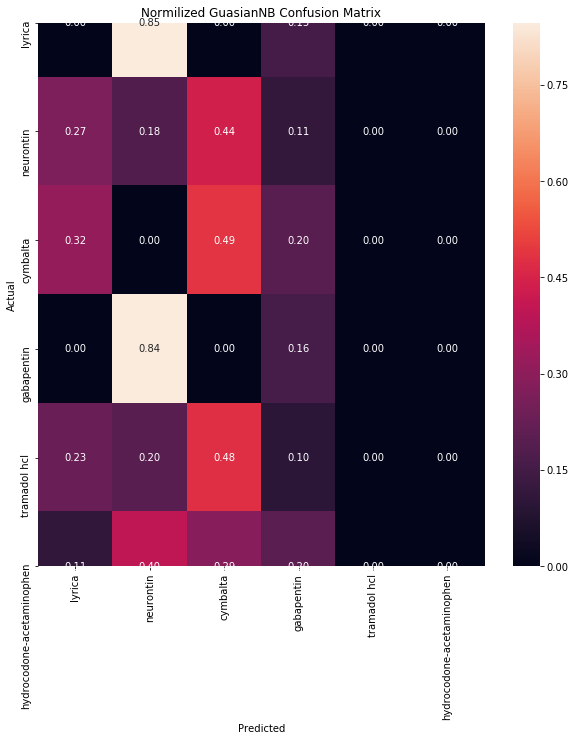

GuasianNB Result
                           precision    recall  f1-score   support

                   lyrica      0.000     0.000     0.000       352
                neurontin      0.069     0.177     0.099       469
                 cymbalta      0.285     0.488     0.360       506
               gabapentin      0.213     0.157     0.181       619
             tramadol hcl      0.000     0.000     0.000       573
hydrocodone-acetaminophen      0.000     0.000     0.000       481

                 accuracy                          0.142      3000
                macro avg      0.095     0.137     0.107      3000
             weighted avg      0.103     0.142     0.113      3000

ROC score of GuasianNB is 0.48


In [65]:
# Confusion matrix of GuasianNB
cm=confusion_matrix(y_test_enc, ga_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized GuasianNB Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ga_pred_y,target_names=class_labels)
print('GuasianNB Result')
print(sk_report)
print('ROC score of GuasianNB is %0.2f'% (multiclass_roc_auc_score(y_test_ency, ga_pred_y)))

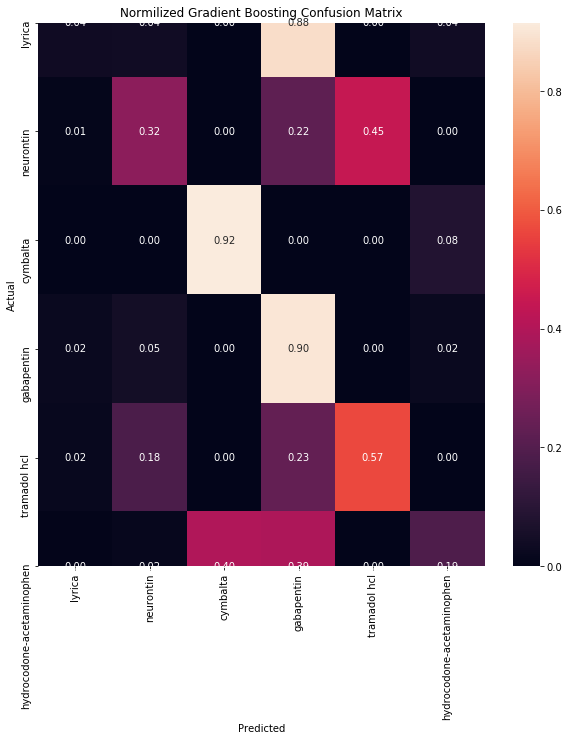

Gradient Boosting Result
                           precision    recall  f1-score   support

                   lyrica      0.277     0.037     0.065       352
                neurontin      0.495     0.322     0.390       469
                 cymbalta      0.707     0.915     0.798       506
               gabapentin      0.432     0.903     0.584       619
             tramadol hcl      0.606     0.565     0.585       573
hydrocodone-acetaminophen      0.558     0.189     0.283       481

                 accuracy                          0.534      3000
                macro avg      0.512     0.489     0.451      3000
             weighted avg      0.523     0.534     0.481      3000

ROC score of Gradient Boosting is 0.70


In [66]:
# Confusion matrix of Gradient Boosting
cm=confusion_matrix(y_test_enc, gb_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Gradient Boosting Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=gb_pred_y,target_names=class_labels)
print('Gradient Boosting Result')
print(sk_report)
print('ROC score of Gradient Boosting is %0.2f'% (multiclass_roc_auc_score(y_test_ency, gb_pred_y)))


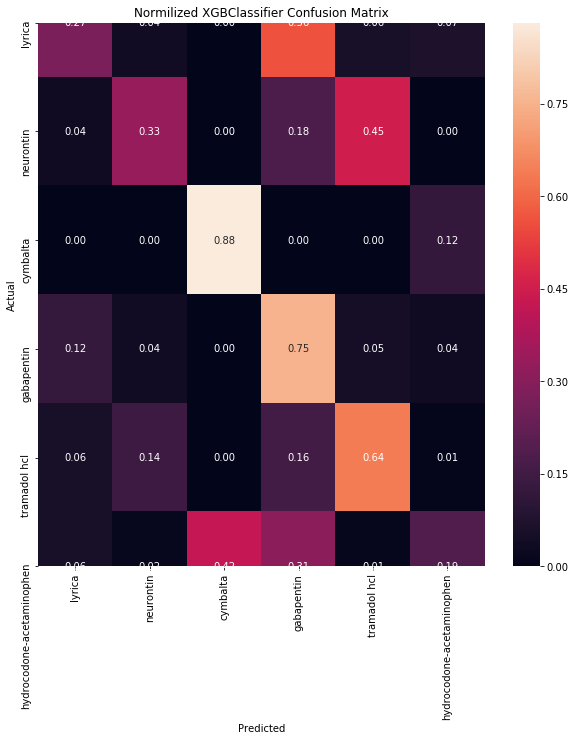

XGBClassifier Result
                           precision    recall  f1-score   support

                   lyrica      0.386     0.273     0.319       352
                neurontin      0.549     0.333     0.414       469
                 cymbalta      0.686     0.881     0.772       506
               gabapentin      0.473     0.751     0.581       619
             tramadol hcl      0.578     0.637     0.606       573
hydrocodone-acetaminophen      0.441     0.185     0.261       481

                 accuracy                          0.539      3000
                macro avg      0.519     0.510     0.492      3000
             weighted avg      0.525     0.539     0.510      3000

ROC score of XGBClassifier is 0.71


In [67]:
# Confusion matrix of XGBClassifier
cm=confusion_matrix(y_test_enc, xgb_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized XGBClassifier Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=xgb_pred_y,target_names=class_labels)
print('XGBClassifier Result')
print(sk_report)
print('ROC score of XGBClassifier is %0.2f'% (multiclass_roc_auc_score(y_test_ency, xgb_pred_y)))


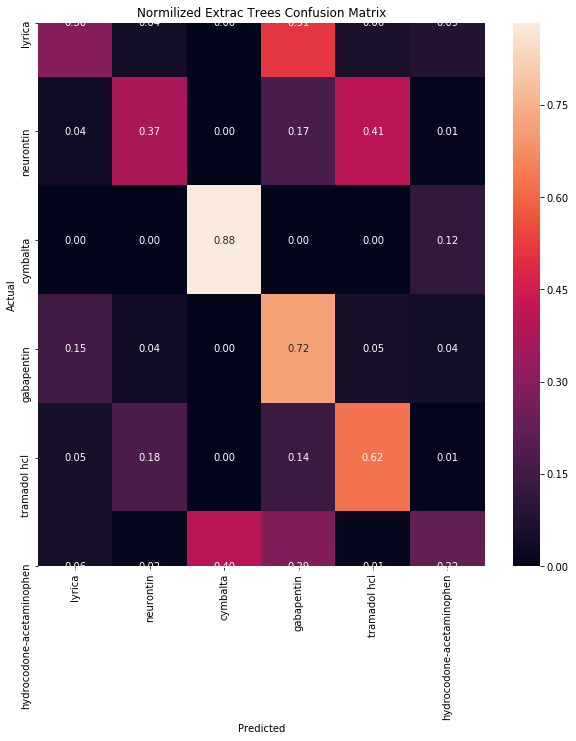

Extrac Trees Result
                           precision    recall  f1-score   support

                   lyrica      0.383     0.298     0.335       352
                neurontin      0.540     0.373     0.441       469
                 cymbalta      0.698     0.883     0.780       506
               gabapentin      0.482     0.717     0.576       619
             tramadol hcl      0.586     0.621     0.603       573
hydrocodone-acetaminophen      0.461     0.222     0.300       481

                 accuracy                          0.545      3000
                macro avg      0.525     0.519     0.506      3000
             weighted avg      0.532     0.545     0.522      3000

ROC score of Extrac Trees is 0.71


In [68]:
# Confusion matrix of Extrac Trees
cm=confusion_matrix(y_test_enc, ex_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Extrac Trees Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ex_pred_y,target_names=class_labels)
print('Extrac Trees Result')
print(sk_report)
print('ROC score of Extrac Trees is %0.2f'% (multiclass_roc_auc_score(y_test_ency, ex_pred_y)))


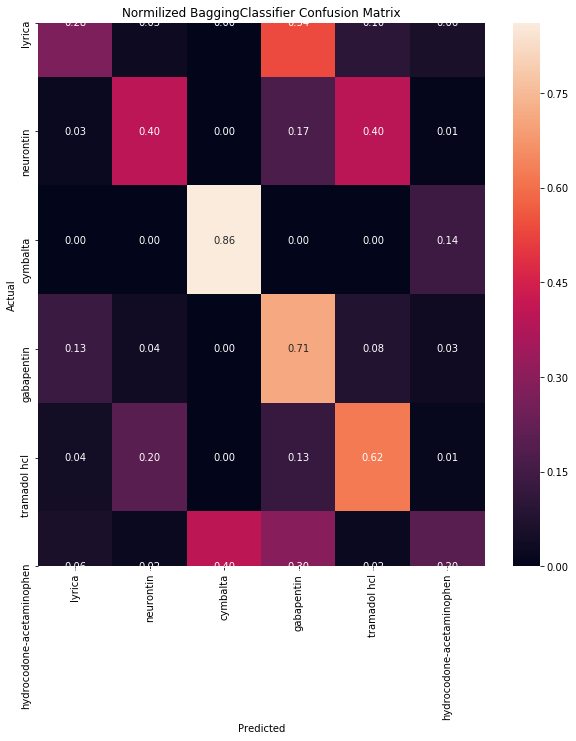

BaggingClassifier Result
                           precision    recall  f1-score   support

                   lyrica      0.396     0.276     0.325       352
                neurontin      0.544     0.399     0.460       469
                 cymbalta      0.692     0.862     0.768       506
               gabapentin      0.476     0.711     0.570       619
             tramadol hcl      0.559     0.621     0.588       573
hydrocodone-acetaminophen      0.436     0.200     0.274       481

                 accuracy                          0.537      3000
                macro avg      0.517     0.511     0.498      3000
             weighted avg      0.523     0.537     0.513      3000

ROC score of BaggingClassifier is 0.71


In [69]:
# Confusion matrix of BaggingClassifier
cm=confusion_matrix(y_test_enc, ba_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized BaggingClassifier Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_ency, y_pred=ba_pred_y,target_names=class_labels)
print('BaggingClassifier Result')
print(sk_report)
print('ROC score of BaggingClassifier is %0.2f'% (multiclass_roc_auc_score(y_test_ency, ba_pred_y)))

In [72]:
print("______________________________________________")
print('MAE of Decision Tree:', metrics.mean_absolute_error(y_test_ency,dtree_pred_y))
print('MSE of Decision Tree:', metrics.mean_squared_error(y_test_ency,dtree_pred_y))
print('RMSE of Decision Tree:', np.sqrt(metrics.mean_squared_error(y_test_ency,dtree_pred_y)))
print("______________________________________________")
print('MAE of Random Forest:', metrics.mean_absolute_error(y_test_ency,rf_pred_y))
print('MSE of Random Forest:', metrics.mean_squared_error(y_test_ency,rf_pred_y))
print('RMSE of Random Forest:', np.sqrt(metrics.mean_squared_error(y_test_ency,rf_pred_y)))
print("______________________________________________")
print('MAE of GradientBoostingClassifier:', metrics.mean_absolute_error(y_test_ency,gb_pred_y))
print('MSE of GradientBoostingClassifier:', metrics.mean_squared_error(y_test_ency,gb_pred_y))
print('RMSE of GradientBoostingClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,gb_pred_y)))
print("______________________________________________")
print('MAE of XGBClassifier:', metrics.mean_absolute_error(y_test_ency,xgb_pred_y))
print('MSE of XGBClassifier:', metrics.mean_squared_error(y_test_ency,xgb_pred_y))
print('RMSE of XGBClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,xgb_pred_y)))
print("______________________________________________")
print('MAE of ExtracTreeClassifier:', metrics.mean_absolute_error(y_test_ency,ex_pred_y))
print('MSE of ExtracTreeClassifier:', metrics.mean_squared_error(y_test_ency,ex_pred_y))
print('RMSE of ExtracTreeClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,ex_pred_y)))
print("______________________________________________")
print('MAE of BaggingClassifier:', metrics.mean_absolute_error(y_test_ency,ba_pred_y))
print('MSE of BaggingClassifier:', metrics.mean_squared_error(y_test_ency,ba_pred_y))
print('RMSE of BaggingClassifier:', np.sqrt(metrics.mean_squared_error(y_test_ency,ba_pred_y)))
print("______________________________________________")

______________________________________________
MAE of Decision Tree: 1.2653333333333334
MSE of Decision Tree: 3.8106666666666666
RMSE of Decision Tree: 1.9520928939644924
______________________________________________
MAE of Random Forest: 1.242
MSE of Random Forest: 3.72
RMSE of Random Forest: 1.9287301521985911
______________________________________________
MAE of GradientBoostingClassifier: 1.202
MSE of GradientBoostingClassifier: 3.3626666666666667
RMSE of GradientBoostingClassifier: 1.8337575266830308
______________________________________________
MAE of XGBClassifier: 1.238
MSE of XGBClassifier: 3.674
RMSE of XGBClassifier: 1.916768113257313
______________________________________________
MAE of ExtracTreeClassifier: 1.231
MSE of ExtracTreeClassifier: 3.6863333333333332
RMSE of ExtracTreeClassifier: 1.9199826388103964
______________________________________________
MAE of BaggingClassifier: 1.2476666666666667
MSE of BaggingClassifier: 3.7196666666666665
RMSE of BaggingClassifier: 1